# South African Language Identification Classification Hackathon Challenge - 

            
**Overview**

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society. The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages. With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

**The Task Challenge**

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.




<a id="cont"></a>

## **TABLE OF CONTENTS**

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#five>4. Text Cleaning and Preprocessing of test data</a>

<a href=#six>5. Modeling</a>

<a href=#seven>6. Model Performance</a>

<a href=#eight>7. Model Explanations</a>

<a id="one"></a>
## **1. IMPORTING THE PACKAGES** 
<a href=#cont>Back to Table of Contents</a>

---
### Brief Description of the Packages  
> The following libraries will be used to aid creation of a Sentiment Analysis model.

>* Numpy:- NumPy (short for Numerical Python) is “the fundamental package for scientific computing with Python” and it is the library Pandas, Matplotlib and Scikit-learn builds on top off.
>* Pandas:- a software library for data manipulation and analysis.
>* Sklearn:- this library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
>*Nltk:- is a suite that contains libraries and programs for statistical language processing. It is one of the most powerful NLP(Natural Language Processing (NLP) is a process of manipulating or understanding the text or speech by any software or machine.) libraries, which contains packages to make machines understand human language and reply to it with an appropriate response.
>*re:- This module provides a set of powerful regular expression facilities, which allows for a quick check whether a given string matches a given pattern (using the match function), or contains such a pattern (using the search function).
>*string:-This module contains a number of functions to process standard Python strings
>*Matplotlib:-  a library for creating static, animated, and interactive visualizations in Python.
>*Seaborn:- a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
>*WordCloud:- a library for visualising frequent words in a text where the size of the words represents their frequency.

In [1]:
# Libraries for importing and loading data
import numpy as np
import pandas as pd

# Libraries for data preparation 
import re
import string
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk

from sklearn.utils import resample

# Libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Libraries for assessing model accuracy 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## **2. LOADING THE DATA**
<a href=#cont>Back to Table of Contents</a>

---

**Brief description of the data**

The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt. The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

**Files Description**

train_set.csv - the training set
test_set.csv - the test set
sample_submission.csv - a sample submission file in the correct format

**Language IDs**

afr - Afrikaans
eng - English
nbl - isiNdebele
nso - Sepedi
sot - Sesotho
ssw - siSwati
tsn - Setswana
tso - Xitsonga
ven - Tshivenda
xho - isiXhosa
zul - isiZulu

**2.1 Loading the datasets**

In [2]:
# load the train dataset
df_train = pd.read_csv('/content/train_set.csv')

# load the test dataset
df_test = pd.read_csv('/content/test_set.csv')

# load the sample submission dataset
samplesubmission = pd.read_csv('/content/sample_submission.csv')


**2.2 Preview the train dataset**

In [3]:
# Preview train dataset
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


**2.3 Preview the test dataset**

In [4]:
# Preview test dataset
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


**2.4 Preview the sample submission dataset**

In [ ]:
# Preview the sample submission dataset
samplesubmission.head()

,index,lang_id
0,1,tsn
1,2,nbl


In this section train, test and samplesubmission data have been uploaded to have a snap shot of how the data looks like. The train data will be used to train the model and the test data will be used to test the accuracy of the model in predicting unseen data. The sample submission file will aid in uploading the model in Kaggle.


<a id="three"></a>
# **3. EXPLORATORY DATA ANALYSIS (EDA)**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

>*What is Exploratory data analysis?*

>Exploratory data analysis (EDA) is the process of analysing and investigating data sets and summarizing their main characteristics, often employing both non-graphical and graphical methods. This section will include a univariate graphical and non-graphical analysis.



### **3.1 UNIVARIATE NON-GRAPHICAL ANALYSIS** 


**3.1.1 Check number of rows and columns in the train and test datasets** 

In [ ]:
# print out the shape of the train dataset
print('The merged dataset has',df_train.shape[0],'rows and',df_train.shape[1],'columns')

The merged dataset has 33000 rows and 2 columns


In [ ]:
# print out the shape of the test dataset
print('The merged dataset has',df_test.shape[0],'rows and',df_test.shape[1],'columns')

The merged dataset has 5682 rows and 2 columns


**3.1.2 Check for presence of null/missing values in the train and test datasets**

In [ ]:
# checking for presence of missing values in the train dataset
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

**Results:** 

The results above confirm that the train dataset has no missing values

In [ ]:
# checking for presence of missing values in the train dataset
df_test.isnull().sum()

index    0
text     0
dtype: int64

**Results:** 

The results above confirm that the test dataset has no missing values, as well

**3.1.3 Analyze the datatypes of each column in the train and test datasets** 

In [ ]:
# Check data types for all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


**Results:** 

The results above show that both the lang_id and text features have an object datetype i.e. the values are in form of a string datatype. Because of this, the values in each of these columns will be transformed into numbers - since no machine learning models can work with strings or objects, but only numerical features. Transformation from text to numbers is done through count vectorization.



In [ ]:
# Check data types for all columns
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


**Results:** 

The results above show that both index feature has an integer datatype, while the text feature has an object datetype. The index feature is a unique identification of each text sentence, while the text feature contains all the sentences in different South African languages. Since the text feature is an object datatype, this feature will also be transformed from text into numbers, through count vectorization. 

**3.1.4 Analyze the descriptive statistics of each column in the train and test datasets** 

In [ ]:
# look at data statistics in the train dataset
df_train.describe(include='all').T

,count,unique,top,freq
lang_id,33000,11,xho,3000
text,33000,29948,ngokwesekhtjheni yomthetho ophathelene nalokhu...,17


**Results:** 

In the train dataset, the lang_id feature has 11 unique values, which means that there are 11 unique South African languages that are listed in the dataset. The most frequent language seems to the 'xho', which is the language id for isiXhosa language and it appears 3000 times in the train_set dataset. As for the text feature, it seems to have 29,948 unique sentenes and the most frequent sentence is 'ngokwesekhtjheni yomthetho ophathelene nalokhu...', which appears 17 times in the dataset.

In [ ]:
# look at data statistics in the test dataset
df_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,5682.0,NaN,NaN,NaN,2841.5,1640.396446,1.0,1421.25,2841.5,4261.75,5682.0
text,5682,5459,Hoekom moet Onderhoud Betaal word?,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Results:** 

In the test dataset, the text feature has 5459 unique entries and the most frequent entry is 'Hoekom moet Onderhoud Betaal word?', which appears 6 times in the dataset.

**3.1.5 Analyze the number of observations in the lang_id feature of the train dataset** 

In [ ]:
# Check the number of observations in each language id class/ category
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

**Results:**

From the results above, all the 11 unique language id classes have the same number of observatios, i.e. 3000, thus confirming that there is no class imbalance in the train_set dataset. However, since the test dataset does not contain the 'lang_id' feature, we cannot perform the same code in it.

### **3.2 UNIVARIATE GRAPHICAL ANALYSIS** 
> In this section, we conduct a graphical analysis in order to inspect the number of observations in the language id column. 

**3.2.1 Plot the number of observations in the lang_id feature of the train dataset** 

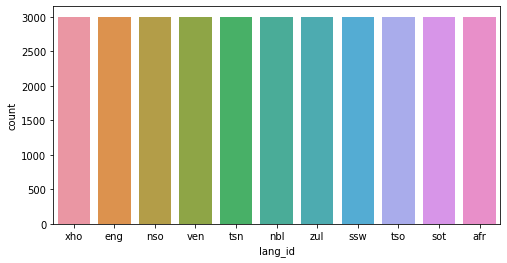

In [3]:
# plotting the distribution of unique language ids in the train dataset
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x="lang_id", data=df_train)
plt.show()

**Results:** 

Based on the description of the data, here is what each value stands for:

Language IDs:


    afr - Afrikaans
    eng - English
    nbl - isiNdebele
    nso - Sepedi
    sot - Sesotho
    ssw - siSwati
    tsn - Setswana
    tso - Xitsonga
    ven - Tshivenda
    xho - isiXhosa
    zul - isiZulu

As is shown above, all the 11 unique language id classes have the same number of observatios, i.e. 3000, thus confirming that there is no class imbalance in the train_set dataset. 

<a id="four"></a>
# **4. TEXT CLEANING AND PREPROCESSING OF THE TRAIN AND TEST DATASETS**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The real world data contains irrelevant or meaningless data termed as noise which can significantly affect the performance of the machine learning process. It is, therefore, necessary to perform text cleaning and preprocessing, in order to eliminate these noises and improve the performance of the machine learning models. The following tasks are executed in order to clean and preprocess the text feature in both the train and test datasets. 

>* identify and remove web-urls from the main message 
>* identify and remove words starting with '#'
>* identify and remove words starting with '@'
>* converting all the words to lower case
>* removing punctuations


### **4.1 Identifying and removing web-url from the texts**

>In removing web_url we use regular expressions. Regular Expressions, also known as “regex” or “regexp”, are used to match strings of text such as particular characters, words, or patterns of characters. They aid in matching and extracting any string pattern from the text. We write a function called *delete_url* that uses regex to identify web-url in a column and remove the same from the column.

In [4]:
def delete_url(data, col):
    """
        Accepts a dataframe and col., removes web urls from the col.
        returns a new dataframe 
    """
    df = data.copy()
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = ''
    df[col] = df[col].replace(to_replace = pattern_url, value = subs_url, regex = True)
    return df

# Create a new train and test dataframe with the text column void of url links
new_df_train = delete_url(df_train, 'text')
new_df_test = delete_url(df_test, 'text')
new_df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


### **4.2 Identifying and removing words starting with # and @**

> We write a function *delete_tags*, to identify and remove words starting with '#' and '@' using regex.

In [5]:
def delete_tags(data, col):
    """
        This function takes in a dataframe and a column, removes all words started with '#' and '@' in the column,
        and returns a new dataframe
    """
    df = data.copy()
    pattern_tags = r'#\w+[#?]'
    pattern_2 = r'@\w+'
    subs_tag = ''
    df[col] = df[col].replace(to_replace = pattern_tags, value = subs_tag, regex = True)
    df[col] = df[col].replace(to_replace = pattern_2, value = subs_tag, regex = True)
    return df

# Create a new train and test dataframe with the text column void of the # and @ tags 
new_df_train = delete_tags(new_df_train, 'text')
new_df_test = delete_tags(new_df_test, 'text')
new_df_test.head()    

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


### **4.3 Convert capitalized words to lowercase** 

> We write a function *word_converter* to convert capitalized words to lowercase words using the string method .lower().

In [6]:
def lower_case(data, col):
    """
        This function takes in a dataframe and col, converts all capitalized words in the column to lowercase,
        and returns a new dataframe.
    """
    df = data.copy()
    df[col] = df[col].str.lower()
    return df

# Create a new dataframe with all words in the message column converted to its lowercase form
new_df_train = lower_case(new_df_train, 'text')
new_df_test = lower_case(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,"mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta.


### **4.4 Remove punctuations**

> We write a function *remove_punc* that uses the string package from python to remove punctuations.

In [7]:
def remove_punctuations(data, col):
    """
        This function takes in a dataframe and a column, uses python string package to identify and remove all
        punctions in the column. It returns a new dataframe
    """
    def operation(post):
        return ''.join([l for l in post if l not in string.punctuation])
    
    df = data.copy()
    
    df[col] = df[col].apply(operation)
    return df

# Create a new train and test dataframe with the text column void of punctuations
new_df_train = remove_punctuations(new_df_train, 'text')
new_df_test = remove_punctuations(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


### **4.5 Remove new lines (\n) from the start of any words**

> Some words too start with '\n' and this is a short form for new line in programming. Words started with '\n' lose their original meaning. Hence, we write a function *remove_new_line* to remove these new lines. 

In [8]:
def remove_new_lines(data, col):
    """
        Takes in a dataframe and a column, returns a new dataframe with a new column void of new line command
    """

    def operation(text):
        result = re.sub("\n", "", text)
        result = re.sub("rt", "", result)
        return result

    df = data.copy()
    
    df[col] = df[col].apply(operation)

    return df

# Create a new train and test dataframe with the text column void of new lines
new_df_train = remove_new_lines(new_df_train, 'text')
new_df_test = remove_new_lines(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


### **4.6 Tokenization process**
> Tokenization refers to splitting up a larger body of text into individual words. We write a function *tokenizer* to tokenize the words in the message column and store same in a new column named *message_tok*

In [9]:
def tokenizer(data, col):
    """
        This function takes in a dataframe and a col, creates a new column to store the tokenized words
        in the inputed column, and returns a new dataframe.
    """
    df = data.copy()
    tokeniser = TreebankWordTokenizer()
    df[col]= df[col].apply(tokeniser.tokenize)

    return df

# Create a new train and test dataframe with the text column containing of the word tokens 
new_df_train = tokenizer(new_df_train, 'text')
new_df_test = tokenizer(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ..."
1,2,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,"[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,"[winste, op, buitelandse, valuta]"


### **4.7 Lemmatization process**

> Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. We write a function *lam_words* to transform all words in the text column, to their root form using lemmatization, to enable us to carter for the shortfall in stemming above.

In [10]:
def lemmatized_words(data, col):
    """
        Takes in a dataframe and a column, converts the words in the column to it root form,
        with the aid of WordNetLemmatizer class from the nltk package.
        Returns a new dataframe with an additional column "message_lam"
    """
    lemmatizer = WordNetLemmatizer()
    def operation(words, lemmatizer):
        return [lemmatizer.lemmatize(word) for word in words] 
    df = data.copy()
    df[col] = df[col].apply(operation, args=(lemmatizer, ))
    
    return df

# Create a new train and test dataframe the text column containing new lemmatized words
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
new_df_train = lemmatized_words(new_df_train, 'text')
new_df_test = lemmatized_words(new_df_test, 'text')
new_df_test.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


,index,text
0,1,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ..."
1,2,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,"[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,"[winste, op, buitelandse, valuta]"


### **4.8 Remove stopwords from the text** 
> Stopwords are the words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. We use the *remove_stop_words* function to remove these stopwords using the stop_words dictionary in the nltk library.

In [11]:
def remove_stop_words(data, col):
    """
        Takes a dataframe and a column, creates a new dataframe with a new column no_stop_word from the input
        dataframe and column, returns the new column
    """
    def operation(toks):
        new_toks = [tok for tok in toks if tok not in stopwords.words('english')]
        return new_toks
    
    df = data.copy()
    df[col] = df[col].apply(operation)

    return df

# Create a new train and test dataframe the text column void of stopwords
nltk.download('stopwords')
new_df_train = remove_stop_words(new_df_train, 'text')
new_df_test = remove_stop_words(new_df_test, 'text')
new_df_test.head()    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,index,text
0,1,"[mmasepala, fa, maemo, kgethegileng, letlelela..."
1,2,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,"[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,"[winste, op, buitelandse, valuta]"


### **4.10 Check for the presence of noise as non-alphanumeric words**

This section removes any instances of noise that appear as non-alphanumeric words in the text columns

In [12]:
def word_type_checker(data, col):
    alphanum_count = 0 
    non_alphanum_count = 0
    
    def operation(str_list , alphanum_count ,non_alphanum_count):
        alphanum = alphanum_count
        non_aphanum = non_alphanum_count
#         print(f'past row values: {(alphanum, non_aphanum)}') # for testing 
        for strg in str_list:
            if strg.isalnum():
                alphanum = alphanum + 1
            else:
                non_aphanum = non_aphanum + 1
        
        return (alphanum ,non_aphanum)
    
    for label, sr in data.iterrows():
        (alphanum_count, non_alphanum_count) = operation(sr[col] , alphanum_count, non_alphanum_count)
#         Uncomment the codes below for testing of this function
#         print(f'accumulated values: {(alphanum_count, non_alphanum_count)}') 
#         if label == 20:
#             break
    
    return (alphanum_count, non_alphanum_count)

(alphanumeric, non_alphanumeric) = word_type_checker(new_df_train, 'text')
(alphanumeric, non_alphanumeric)

(1125501, 233)

### **4.11 Convert Processed Words to Corpus**

> We have to remove the delimiters introduced during tokenization. This process is needed to enable us form a corpus. To achieve this, we write a function **form_corpus**.

In [13]:
def form_corpus(data, col):
    """
        This function takes in a dataframe and a column with tokenized text, 
        returns a new dataframe with an additional column(de_tok), which is made up of all words in the inserted colunm
        but void of delimeters.
    """
    def operation(tok_list):
        string = ' '.join(tok_list)
        return string
    df = data.copy()
    df[col] = df[col].apply(operation)
    
    return df

# Create a new train and test dataframe the text column void of delimeters
new_df_train = form_corpus(new_df_train, 'text')
new_df_test = form_corpus(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,mmasepala fa maemo kgethegileng letlelela kgat...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


#### **4.12 Feature extraction process**

> In an earlier section, we saw that the text and lang_id features in the train dataset, as well as the text feature in the test dataset had an object datatype, hence need to be converted to a numeric datatype. To execute this task and more, we use the **CountVectorizer** as well as the **TfidfVectorizer**


In [50]:
# Initialize an object of CountVectorizer
count_vector = CountVectorizer(max_features=20000,analyzer='word', ngram_range=(1, 2), )

# Initialize an object of TfidfVectorizer
tfidf_vector = TfidfVectorizer( analyzer='word', ngram_range=(1, 2))

# Define a list that stores the two vectorizers (CountVectorizer and TFidfVecorizer ) and enables us to use index number (0,1), to select any vectorizer of choice 
VectorizerSelector = [count_vector, tfidf_vector]
vector = VectorizerSelector[0]

# Now, perform the feature extraction from the text column in the train and test datasets, using the vector variable 
X_count_train = vector.fit_transform(new_df_train['text'].values.astype(str))
X_count_test = vector.transform(new_df_test['text'].values.astype(str))
X_count_train.shape

(33000, 20000)

In [15]:
# Finally, convert the vectorized data back to pandas dataframes
X_count_train_df = pd.DataFrame(data=X_count_train.toarray(),columns = vector.get_feature_names())
X_count_test_df = pd.DataFrame(data=X_count_test.toarray(),columns = vector.get_feature_names())
X_count_test_df.head()

,aa,aan,aan die,aan elke,aan enige,aan jou,aan te,aandag,aandui,aangebied,...,ṱo,ṱo ḓa,ṱo ḓaho,ṱo ḓea,ṱola,ṱoḓa,ṱoḓea,ṱun,ṱun ḓa,ṱuṱuwedza
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="five"></a>
# **5. MODELLING**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



---

### **5.1 First, perform the train test split** 
Before we embark on the modelling process, we have to split our data set into two sets (training and testing). The train set is used to fit the machine learning models on the data, while the test set is used to evaluate the performance of the models. To achive this, we make use of sklearn train_test_split class.

In [16]:
# first, define the labels from the df_train dataset
y = df_train['lang_id']

# then, perform the train test split
X_train, X_test, y_train, y_test = train_test_split(X_count_train, y, test_size=0.2, random_state=RANDOM_STATE)

### **5.2 Define the machine learning classification models**

Five machine learning classification models were used, namely:

>i. Logistic regression \
>ii. Passive aggressive classifier\
>iii. Support vector machine classifier \
>iv. Random forest classifier \
>v. Multinomial naive bayes classifier \ 











### **5.3 Train and evaluate the performance of each classification model**

We write a function **model_eval**, that uses the train and test features and labels data set generated above, to train a model, make prediction with the model, and output the models performance with the aid of **classification_report** from sklearn.

In [27]:
def model_eval(model):
    """
        This function accepts a model as an input, train and make predictions with the model, using the train and test
        data set generated above, and ouput the trained model and the model's performance as a tuple.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return (model, classification_report(y_test, y_pred))

In [21]:
def eval_metrics(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  accuracy  = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred, average = 'weighted')
  recall    = metrics.recall_score(y_test, y_pred, average = 'weighted')
  f1_test   = metrics.f1_score(y_test, y_pred, average = 'weighted') 

  return accuracy, precision, recall, f1_test  


### **5.4 Train and evaluate performance of the logistic regression model**

This section trains and evaluates the performance of the logistic regression model, using the *model_val* and *eval_metrics* functions, that have been declared above.

In [28]:
# instantiate a logistic regression model
logreg_model = LogisticRegression(C=5, multi_class='ovr')

# Train, predict and evaluate model performance 
(logreg_model, model_per) = model_eval(logreg_model)

# Print model classification report
print("\n\nLogistic Regression Classification Report:\n\n",model_per)



Logistic Regression Classification Report:

               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.98      0.98       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      0.99      0.99       584
         tsn       1.00      0.99      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      0.99      0.99       609
         zul       0.97      0.98      0.97       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### **5.5 Train and evaluate performance of the passive aggressive classifier model**

This section trains and evaluates the performance of the passive aggressive classifier model, using the model_val and eval_metrics functions, that have been declared above.

In [62]:
# instantiate a Passive Aggressive classifier model
pac_model = PassiveAggressiveClassifier()

# Train, predict and evaluate model performance 
(pac_model, model_per) = model_eval(pac_model)

# Print model classification report
print("\n\nPassive Aggressive Classification Report:\n\n",model_per)



Passive Aggressive Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.97      0.98      0.97       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      0.98      0.99       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      0.98      0.99       609
         zul       0.96      0.97      0.97       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### **5.6 Train and evaluate performance of the support vector classifier model**

This section trains and evaluates the performance of the support vector classifier model, using the model_val and eval_metrics functions, that have been declared above.

In [30]:
# instantiate an SVC regression model
svc_model = SVC()

# Train, predict and evaluate model performance 
(svc_model, model_per) = model_eval(svc_model)

# Print model classification report
print("\n\nSupport Vector Machine Classification Report:\n\n",model_per)



Support Vector Machine Classification Report:

               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.97      0.98       583
         nso       1.00      0.99      0.99       625
         sot       1.00      1.00      1.00       618
         ssw       0.98      1.00      0.99       584
         tsn       0.99      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.97      0.99      0.98       609
         zul       0.97      0.97      0.97       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### **5.7 Train and evaluate performance of the random forest classifier model**

This section trains and evaluates the performance of the random forest classifier model, using the model_val and eval_metrics functions, that have been declared above.

In [31]:
# instantiate a Random Forest Classifier regression model
randomF_model = RandomForestClassifier()

# Train, predict and evaluate model performance 
(randomF_model, model_per) = model_eval(randomF_model)

# Print model classification report
print("\n\nRandom Forest Classification Report:\n\n",model_per)



Random Forest Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.98      1.00      0.99       615
         nbl       0.97      0.95      0.96       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.92      0.97      0.95       584
         tsn       0.99      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.97      0.93      0.95       609
         zul       0.94      0.93      0.93       590

    accuracy                           0.98      6600
   macro avg       0.98      0.98      0.98      6600
weighted avg       0.98      0.98      0.98      6600



### **5.8 Train and evaluate performance of the multinomial naive bayes  classifier model**

This section trains and evaluates the performance of the multinomial naive bayes classifier model, using the model_val and eval_metrics functions, that have been declared above.

In [32]:
# Instanciate a MultinomialNB model
mnb_model = MultinomialNB()

# Train, predict and evaluate model performance 
(mnb_model, model_per) = model_eval(mnb_model)

# Print model classification report
print("\n\nMultinomial Naive Bayes Classification Report:\n\n",model_per)



Multinomial Naive Bayes Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      0.99      0.99       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



The Multinomial Naive Bayes classifier model was the highest-performing model with an overall accuracy of 1.00, while the Random Forest classifier was the least-performing with an overall accuracy score of 0.98.

<a id="six"></a>
# **6. MODEL PERFORMANCE**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### **6.1 Metrics for Model evaluation.**

>There are many ways for measuring classification performance. Accuracy and confusion matrix are some of the most popular metrics. Precision-recall is a widely used metrics for classification problems.

>>1. **Confusion Matrix**

>A confusion matrix is defined as thetable that is often used to describe the performance of a classification model on a set of the test data for which the true values are known.

>>><img src ="https://drive.google.com/uc?id=1RIgdzp1ysRs0NYpY_VD-g1MUdzOBlNO-" width = "250" height = '200'/>

>>**True Positive**: We predicted positive and it’s true. 

>>**True Negative**: We predicted negative and it’s true. 

>>**False Positive (Type 1 Error)**- We predicted positive and it’s false. 

>>**False Negative (Type 2 Error)**- We predicted negative and it’s false. 


>It is extremely useful for measuring the Recall, Precision and Accuracy.

>>2. **Accuracy**

>This is simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.

\begin{align}
        \text{Accuracy = }\left. \frac{TP + TN}{TP + TN + FP + FN} \right.
    \end{align}

>Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes.

>>3. **Recall (Sensitivity)** 

>Recall explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where False Negative is of higher concern than False Positive.

\begin{align}
        \text{Recall = }\left. \frac{TP}{TP + FN} \right.
    \end{align}

>>4. **F1 Score**

>It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall.

\begin{align}
        \text{F1 = }\left. \mathbf{2} \cdot \mathbf{\frac{Precision * Recall}{Precision + Recall}} \right.
    \end{align}

>The F1 score punishes extreme values more. F1 Score could be an effective evaluation metric in the following cases:

>>* When FP and FN are equally costly.
>>* Adding more data doesn’t effectively change the outcome
>>* True Negative is high

In [87]:
names = ['Logistic Regression', 
         'Passive Aggresive classifier',  
         'Support Vector Machine', 
         'Random Forest', 
         'Multinomial Naive Bayes']

In [88]:
classifiers = [
    LogisticRegression(multi_class='ovr'),
    PassiveAggressiveClassifier(),
    SVC(),
    RandomForestClassifier(),    
    MultinomialNB()
]

In [89]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    model = clf.fit(X_train, y_train)
    
    print ('... predicting')   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_test, y_pred_test)
    precision = metrics.precision_score(y_test, y_pred_test, average = 'weighted')
    recall    = metrics.recall_score(y_test, y_pred_test, average = 'weighted')
       
    f1_test   = metrics.f1_score(y_test, y_pred_test, average = 'weighted')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_test, y_pred_test)
    class_report[name] = metrics.classification_report(y_test, y_pred_test)
    
    results.append([name, accuracy, precision, recall, f1_test])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Test'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Passive Aggresive classifier model...
... predicting
... scoring
Fitting Support Vector Machine model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Multinomial Naive Bayes model...
... predicting
... scoring
... All done!


In [90]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Test
Classifier,,,,
Multinomial Naive Bayes,0.997576,0.997581,0.997576,0.997576
Logistic Regression,0.993333,0.993345,0.993333,0.993334
Passive Aggresive classifier,0.990606,0.990627,0.990606,0.990612
Support Vector Machine,0.990303,0.990332,0.990303,0.990295
Random Forest,0.978333,0.978565,0.978333,0.978322


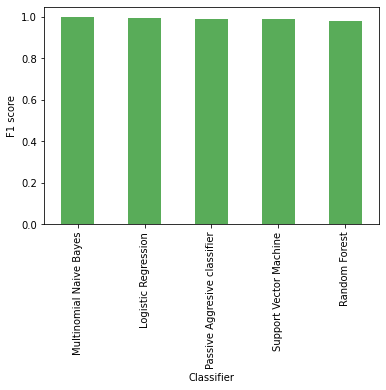

In [ ]:
# plot the results on bar graphs 

results.sort_values('F1 Test', ascending=False, inplace=True)
results['F1 Test'].plot(kind = 'bar', facecolor='g', alpha=0.65)
plt.xlabel('Classifier')
plt.ylabel('F1 score')
plt.show()

**Key Insights:**

The Multinomial Naive Bayes classifier model was the highest-performing model with an f1_score of 0.997576, while the random forest classifier was the least-performing with an f1_score of 0.977738. 

# **7. MODEL IMPROVEMENT - FEATURE SELECTION USING THE VARIANCE THRESHOLDING AND KBEST FEATURES TECHNIQUES**

### **7.1 The Variance Threshold Technique**

In [120]:
# Import the var thresh model and choose a threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.000001)

# Transform (i.e.: run selection on) the training data
X_train_vt = selector.fit_transform(X_train)

# Now we'll need to remove the same features we did in the thresholding process
X_test_vt = selector.transform(X_test)

X_train_vt.shape

(26400, 20000)

In [121]:
# Instanciate a MultinomialNB model
mnb_vt = MultinomialNB()

# Fit model to the transformed data
mnb_vt.fit(X_train_vt, y_train)

mnb_vt_predictions = mnb_vt.predict(X_test_vt)

print(classification_report(y_test, mnb_vt_predictions))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      0.99      0.99       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [123]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_mnb_vt = mnb_vt.predict(X_count_test)

# then, create a dataframe for the predicted results
mnb_df_vt = pd.DataFrame({
    'index': df_test['index'],
    'lang_id': y_pred_mnb_vt
})

print(mnb_df_vt.head())

# finally, convert the predicted results to a csv file for Kaggle submission
mnb_df_vt.to_csv('submission_mnb_vt.csv',index=False)

   index lang_id
0      1     tsn
1      2     nbl
2      3     ven
3      4     ssw
4      5     afr


### **7.2 The KBest Features Technique**

In [ ]:
# Import the feature selector module
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

# Set up selector, choosing score function and number of features to retain
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=15500)

# Transform (i.e.: run selection on) the training data
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)
X_train_kbest.shape

(26400, 15500)

In [ ]:
# Fit model to the transformed data
mnb_kbest = MultinomialNB()
mnb_kbest.fit(X_train_kbest, y_train)

X_test_kbest = selector_kbest.transform(X_test)

# Generate predictions from var thresh model
pred_mnb_kbest = mnb_kbest.predict(X_test_kbest)

print(classification_report(y_test, pred_mnb_kbest))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.99      0.98      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [ ]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_mnb_kbest = mnb_kbest.predict(X_count_test)

# then, create a dataframe for the predicted results
mnb_df_kbest = pd.DataFrame({
    'index': df_test['index'],
    'lang_id': y_pred_mnb_kbest
})

print(mnb_df_kbest.head())

# finally, convert the predicted results to a csv file for Kaggle submission
mnb_df_kbest.to_csv('submission_mnb_kbest.csv',index=False)

   index lang_id
0      1     tsn
1      2     nbl
2      3     ven
3      4     ssw
4      5     afr


# **8. MAKE PREDICTIONS WITH THE MODELS GENERATED ABOVE FOR KAGGLE SUBMISSION**  

We generate predictions for five different models above:
- **y_pred_logistic** (Logistics Regression model)
- **y_pred_pac** (Passive Aggressive Classifier
- **y_pred_svc** (SVC model)
- **y_pred_random** (RandomForestClasifier model)
- **y_pred_mnb** (MultinomialNB)


### **8.1 Logistic Regression Model**

Create predictions from the logistic regression model 

In [59]:
# Make prediction with logistics regression model and the test data
y_pred_logistic = logreg_model.predict(X_count_test)

# then, create a dataframe of the predicted results  
logreg_df = pd.DataFrame({
    'index': df_test['index'],
    'lang_id': y_pred_logistic
})

print(logreg_df.head())

# finally, convert the predicted results to a csv file for Kaggle submission
logreg_df.to_csv('submission_logreg.csv',index=False)

   index lang_id
0      1     ssw
1      2     nbl
2      3     ssw
3      4     ssw
4      5     ssw


### **8.2 Passive aggressive classifier**

Create predictions from the passive aggressive classifier [link text](https://)model

In [63]:
# Make prediction with logistics regression model and the test data
y_pred_pac = pac_model.predict(X_count_test)

# then, create a dataframe of the predicted results 
pac_df = pd.DataFrame({
    'index': df_test['index'],
    'lang_id': y_pred_pac
})

print(pac_df.head())

# finally, convert the predicted results to a csv file for Kaggle submission
pac_df.to_csv('submission_pac.csv',index=False)

   index lang_id
0      1     tsn
1      2     nbl
2      3     ven
3      4     ssw
4      5     afr


### **8.3 Support vector machine classifier**

Create predictions from the support vector machine classifier model

In [55]:
# Make prediction with support vector model and the test data
y_pred_svc = svc_model.predict(X_count_test)

# then, create a dataframe for the predicted results 
svc_df = pd.DataFrame({
    'index': df_test['index'],
    'lang_id': y_pred_svc
})

print(svc_df.head())

# finally, convert the predicted results to a csv file for Kaggle submission
svc_df.to_csv('submission_svc.csv',index=False)

,index,lang_id
0,1,ssw
1,2,nbl
2,3,ssw
3,4,ssw
4,5,ssw


### **8.4 Random forest classifier model**

Create predictions from the random forest classifier regression model

In [60]:
# Make prediction with random forest clasifier model and the test data
y_pred_random = randomF_model.predict(X_count_test)

# then, create a dataframe for the predicted results
rf_df = pd.DataFrame({
    'index': df_test['index'],
    'lang_id': y_pred_random
})

print(rf_df.head())

# finally, convert the predicted results to a csv file for Kaggle submission
rf_df.to_csv('submission_rf.csv',index=False)

   index lang_id
0      1     ssw
1      2     nbl
2      3     ssw
3      4     ssw
4      5     ssw


### **8.5 Multinomial naive bayes classifier model**

Create predictions from the multinomial naive bayes classifier model

In [58]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_mnb = mnb_model.predict(X_count_test)

# then, create a dataframe for the predicted results
mnb_df = pd.DataFrame({
    'index': df_test['index'],
    'lang_id': y_pred_mnb
})

print(mnb_df.head())

# finally, convert the predicted results to a csv file for Kaggle submission
mnb_df.to_csv('submission_mnb.csv',index=False)

,index,lang_id
0,1,ssw
1,2,nbl
2,3,ssw
3,4,ssw
4,5,ssw


In [44]:
# instantiate a logistic regression model
pac_model = PassiveAggressiveClassifier()

# Create and store hyperparameters values
Cs = [0.001, 0.01, 0.1, 1, 10]

# Store hyperparameters in a dictionary
parameters = {
    'C' : Cs,
}

# Instanciate a GridsearchCV and train same with 
pac_model_ht = GridSearchCV(pac_model, parameters)

# Train, predict and evaluate model performance 
(pac_model_ht, model_per) = model_eval(pac_model_ht)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.98      0.98      0.98       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      0.99      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      0.99      0.99       609
         zul       0.97      0.98      0.97       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### **8.6 Summary**

> Although the Multinomial naive bayes achieved an overall accuracy of 1.00 with the valuation set, it got a 0.93 score with the test data, during the kaggle submission.